In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

W0821 20:44:31.659867 139914521564928 deprecation.py:323] From <ipython-input-3-2f44eee0991e>:3: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0821 20:44:31.660583 139914521564928 deprecation.py:323] From /home/seung/.venv/py3Keras/lib/python3.5/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0821 20:44:31.661127 139914521564928 deprecation.py:323] From /home/seung/.venv/py3Keras/lib/python3.5/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:262: extract_images (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed 

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz


W0821 20:44:31.895610 139914521564928 deprecation.py:323] From /home/seung/.venv/py3Keras/lib/python3.5/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [4]:
# Training Parameters
learning_rate = 0.01
num_steps = 30000
batch_size = 256

display_step = 1000
examples_to_show = 10

In [5]:
# Network Parameters
num_hidden_1 = 256 # 1st layer num features
num_hidden_2 = 128 # 2nd layer num features (the latent dim)
num_input = 784 # MNIST data input (img shape: 28*28)

In [6]:
# tf Graph input (only pictures)
X = tf.placeholder("float", [None, num_input])

weights = {
    'encoder_h1': tf.Variable(tf.random_normal([num_input, num_hidden_1])),
    'encoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_hidden_2])),
    'decoder_h1': tf.Variable(tf.random_normal([num_hidden_2, num_hidden_1])),
    'decoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_input])),
}
biases = {
    'encoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'encoder_b2': tf.Variable(tf.random_normal([num_hidden_2])),
    'decoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'decoder_b2': tf.Variable(tf.random_normal([num_input])),
}

In [7]:
# Building the encoder
def encoder(x):
    # Encoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']),
                                   biases['encoder_b1']))
    # Encoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['encoder_h2']),
                                   biases['encoder_b2']))
    return layer_2


In [8]:
# Building the decoder
def decoder(x):
    # Decoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']),
                                   biases['decoder_b1']))
    # Decoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['decoder_h2']),
                                   biases['decoder_b2']))
    return layer_2

In [9]:
# Construct model
encoder_op = encoder(X)
decoder_op = decoder(encoder_op)

In [10]:
# Prediction
y_pred = decoder_op
# Targets (Labels) are the input data.
y_true = X

In [11]:
# Define loss and optimizer, minimize the squared error
loss = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
#optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(loss)
optimizer = tf.train.AdamOptimizer (learning_rate).minimize(loss)

W0821 20:44:32.222137 139914521564928 deprecation.py:323] From /home/seung/.venv/py3Keras/lib/python3.5/site-packages/tensorflow/python/ops/math_grad.py:1205: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [12]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

In [13]:
sess = tf.InteractiveSession()

In [14]:
sess.run(init)

In [15]:
# Training
vloss = []
for i in range(1, num_steps+1):
    # Prepare Data
    # Get the next batch of MNIST data (only images are needed, not labels)
    batch_x, _ = mnist.train.next_batch(batch_size)

    # Run optimization op (backprop) and cost op (to get loss value)
    _, l = sess.run([optimizer, loss], feed_dict={X: batch_x})
    # Display logs per step
    if i % display_step == 0 or i == 1:
        vloss.append(l)
        print('Step %i: Minibatch Loss: %f' % (i, l))


Step 1: Minibatch Loss: 0.447724
Step 1000: Minibatch Loss: 0.053737
Step 2000: Minibatch Loss: 0.046944
Step 3000: Minibatch Loss: 0.045779
Step 4000: Minibatch Loss: 0.043281
Step 5000: Minibatch Loss: 0.043254
Step 6000: Minibatch Loss: 0.039786
Step 7000: Minibatch Loss: 0.040620
Step 8000: Minibatch Loss: 0.041085
Step 9000: Minibatch Loss: 0.036786
Step 10000: Minibatch Loss: 0.039287
Step 11000: Minibatch Loss: 0.039570
Step 12000: Minibatch Loss: 0.040171
Step 13000: Minibatch Loss: 0.038401
Step 14000: Minibatch Loss: 0.037928
Step 15000: Minibatch Loss: 0.036502
Step 16000: Minibatch Loss: 0.038129
Step 17000: Minibatch Loss: 0.035703
Step 18000: Minibatch Loss: 0.035671
Step 19000: Minibatch Loss: 0.037439
Step 20000: Minibatch Loss: 0.036374
Step 21000: Minibatch Loss: 0.036598
Step 22000: Minibatch Loss: 0.035450
Step 23000: Minibatch Loss: 0.033405
Step 24000: Minibatch Loss: 0.035156
Step 25000: Minibatch Loss: 0.036494
Step 26000: Minibatch Loss: 0.036710
Step 27000: Mi

In [16]:
# Testing
# Encode and decode images from test set and visualize their reconstruction.
n = 4
canvas_orig = np.empty((28 * n, 28 * n))
canvas_recon = np.empty((28 * n, 28 * n))
for i in range(n):
    # MNIST test set
    batch_x, _ = mnist.test.next_batch(n)
    # Encode and decode the digit image
    g = sess.run(decoder_op, feed_dict={X: batch_x})

    # Display original images
    for j in range(n):
        # Draw the original digits
        canvas_orig[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = \
            batch_x[j].reshape([28, 28])
    # Display reconstructed images
    for j in range(n):
        # Draw the reconstructed digits
        canvas_recon[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = \
            g[j].reshape([28, 28])


Original Images


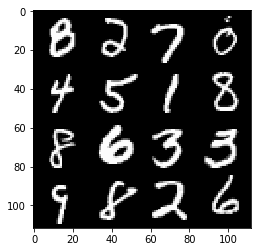

Reconstructed Images


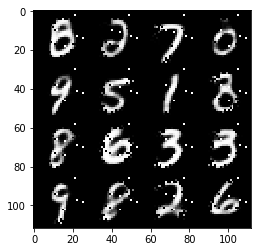

In [17]:
print("Original Images")
plt.figure(figsize=(n, n))
plt.imshow(canvas_orig, origin="upper", cmap="gray")
plt.show()

print("Reconstructed Images")
plt.figure(figsize=(n, n))
plt.imshow(canvas_recon, origin="upper", cmap="gray")
plt.show()

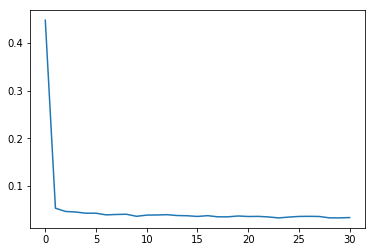

In [18]:
plt.figure()
plt.plot(vloss)